In [1]:
import apc
import pandas as pd

In [2]:
import warnings
warnings.simplefilter('ignore',FutureWarning)

In [3]:
data1=pd.read_excel('hello/APC_input3.xlsx',sheet_name='conschangeall',index_col=0)
data1

,1989,1994,1999,2004,2009,2014
25,50018,43361,32693,42219,3643,30330
30,45915,45144,14127,16104,3648,20098
35,49360,49771,20488,11476,6249,5549
40,58511,64438,29346,14342,18994,15857
45,87531,100949,56144,41477,35148,27325
50,72722,68329,18498,7479,1941,15840
55,26518,19220,-36779,-48612,-54305,-18630


In [4]:
data2=pd.read_excel('hello/APC_input3.xlsx',sheet_name='unempchangeall',index_col=0)
data2

,1989,1994,1999,2004,2009,2014
25,-0.5,0.6,2,0.1,0.4,-1.6
30,-0.5,0.6,2,0.1,0.4,-1.6
35,-0.5,0.6,2,0.1,0.4,-1.6
40,-0.5,0.6,2,0.1,0.4,-1.6
45,-0.5,0.6,2,0.1,0.4,-1.6
50,-0.5,0.6,2,0.1,0.4,-1.6
55,-0.5,0.6,2,0.1,0.4,-1.6


In [5]:
model=apc.Model()
model.data_from_df(response=data1, rate=data2, data_format='AP')
#consumption becomes response

In [6]:
model.data_vector.tail()
#could do without the dose

response       dose  rate
Period Age Cohort                           
2014   35  1979        5549  -3468.125  -1.6
       40  1974       15857  -9910.625  -1.6
       45  1969       27325 -17078.125  -1.6
       50  1964       15840  -9900.000  -1.6
       55  1959      -18630  11643.750  -1.6

In [7]:
model._vector_to_array(model.data_vector['response'], space='AC').fillna('')

Cohort,1934,1939,1944,1949,1954,1959,1964,1969,1974,1979,1984,1989
Age,,,,,,,,,,,,
25,,,,,,,50018,43361,32693,42219,3643,30330
30,,,,,,45915,45144,14127,16104,3648,20098,
35,,,,,49360,49771,20488,11476,6249,5549,,
40,,,,58511,64438,29346,14342,18994,15857,,,
45,,,87531,100949,56144,41477,35148,27325,,,,
50,,72722,68329,18498,7479,1941,15840,,,,,
55,26518,19220,-36779,-48612,-54305,-18630,,,,,,


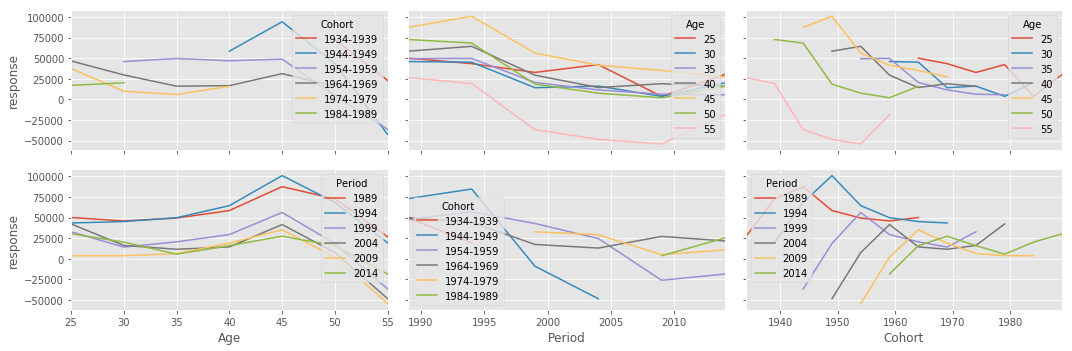

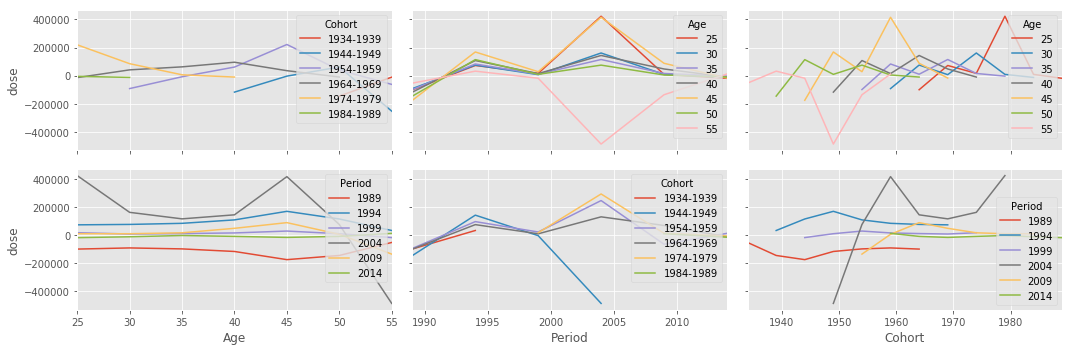

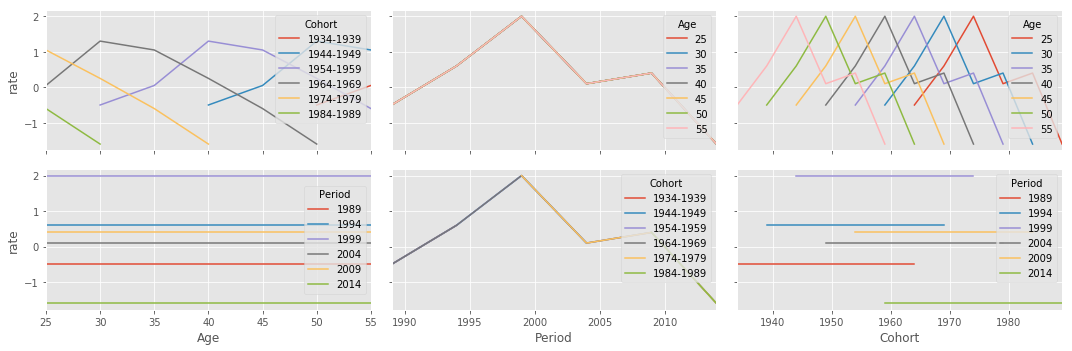

In [8]:
model.plot_data_within(figsize=(15,5),logy=False)
#age groups can not be grouped together 20-25, should be 20, 25, ...

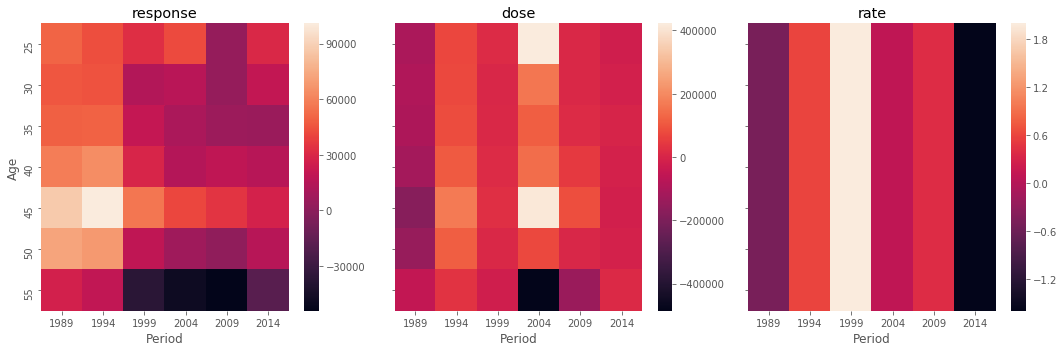

In [9]:
model.plot_data_heatmaps(figsize=(15,5))

In [11]:
model.fit_table('poisson_response')
model.deviance_table

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:131: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/regression/_tools.py:49: RuntimeWarning: invalid value encountered in multiply
  self.wexog = w_half[:, None] * exog


LinAlgError: SVD did not converge in Linear Least Squares

In [29]:
model.fit_table('poisson_dose_response', attach_to_self=False).loc[['APC']]
model.deviance_table
#the model can only be done with dose input, which is not input initially but calculated internally
#the following is not relevant therefore

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/regression/_tools.py:99: RuntimeWarning: divide by zero encountered in double_scalars
  scale = np.dot(wresid, wresid) / df_resid
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:426: RuntimeWarning: overflow encountered in true_divide
  endog_mu = self._clean(endog / mu)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:477: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:131: RuntimeWarning: invalid value encountered in multi

LinAlgError: SVD did not converge in Linear Least Squares

In [30]:
model.fit_table('poisson_dose_response',attach_to_self=False).loc[['APC']]

LinAlgError: SVD did not converge in Linear Least Squares

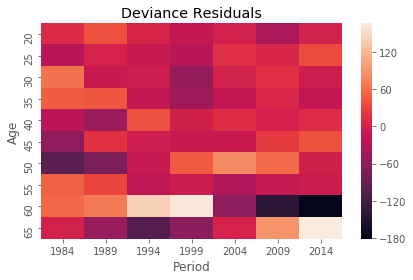

In [41]:
model.plot_residuals(simplify_ranges=False)

In [31]:
model.parameters

AttributeError: 'Model' object has no attribute 'parameters'

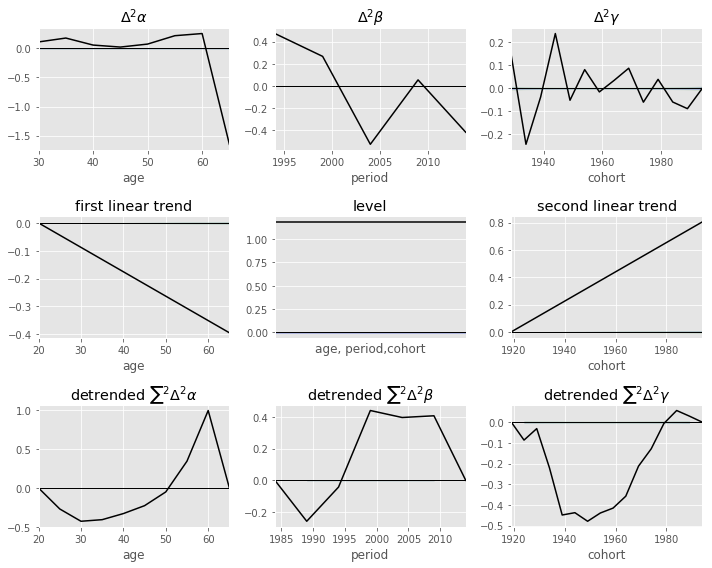

In [43]:
model.plot_parameters(around_coef=False)

In [44]:
model.fit_table()
model.deviance_table

,deviance,df_resid,P>chi_sq,LR_vs_APC,df_vs_APC,P>chi_sq
APC,226870,40,0,NaN,NaN,NaN
AP,638010,54,0,411140,14,0
AC,1.24106e+06,45,0,1.01419e+06,5,0
PC,2.10739e+06,48,0,1.88052e+06,8,0
Ad,1.59871e+06,59,0,1.37184e+06,19,0
Pd,2.97137e+06,62,0,2.7445e+06,22,0
Cd,3.23356e+06,53,0,3.00669e+06,13,0
A,3.00823e+06,60,0,2.78136e+06,20,0
P,3.08862e+06,63,0,2.86175e+06,23,0
C,3.88778e+06,54,0,3.66091e+06,14,0
